In [22]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
pip install ucimlrepo

In [24]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [25]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [27]:
# Getting the columns list
column_names = X.columns.to_list()

In [28]:
# seeing the data in dataset
for i in range(0,6):
  print(f'{X.iloc[:,i].value_counts()}')

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64


In [29]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in column_names:
  X.loc[:,column] = encoder.fit_transform(X[column])

In [30]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [31]:
print(y.value_counts())
print(y.head())

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
   class
0  unacc
1  unacc
2  unacc
3  unacc
4  unacc


In [32]:
y = encoder.fit_transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print(encoder.classes_)
y[:10]

['acc' 'good' 'unacc' 'vgood']


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
X = X.values

In [35]:
X[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=object)

In [36]:
# splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [37]:
# Training Random Forest
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier()
random_clf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
# cross validation to find the model performance
from sklearn.model_selection import GridSearchCV,cross_val_score
score = cross_val_score(random_clf,X_train[:1000],y_train[:1000],cv=10,scoring='accuracy')
print(f'Score {score.mean()}')
print(f'Variation in score {score.std()}')

Score 0.945
Variation in score 0.023345235059857493


In [39]:
# Grid Search for model tunning
parameter = {
    'n_estimators' : [50,100,150,200],
    'criterion' : ['gini','entropy','log_loss'],
}
grid = GridSearchCV(random_clf,param_grid=parameter,scoring='accuracy',cv=10)
grid.fit(X_train[:1000],y_train[:1000])
print(f'score: {grid.best_score_}')
model = grid.best_estimator_

score: 0.9579999999999999


Classification Report:               precision    recall  f1-score   support

           0       0.95      0.94      0.94        77
           1       0.76      0.93      0.84        14
           2       1.00      0.99      0.99       242
           3       1.00      0.92      0.96        13

    accuracy                           0.97       346
   macro avg       0.93      0.94      0.93       346
weighted avg       0.98      0.97      0.97       346



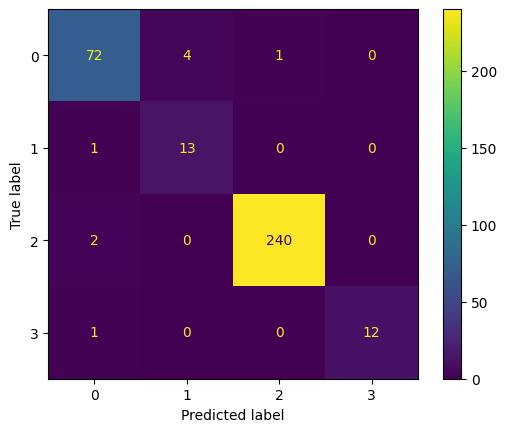

In [40]:
# Trying on test set
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
y_pred = model.predict(X_test)
print(f'Classification Report: {classification_report(y_test,y_pred)}')
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)